In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import (
    ensemble,
    preprocessing,
    tree,
)
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
)
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
from yellowbrick.model_selection import (
    LearningCurve,
)


In [2]:
url = (
    "http://biostat.mc.vanderbilt.edu/"
    "wiki/pub/Main/DataSets/titanic3.xls"
)

In [20]:
#!pip install xlrd
df = pd.read_excel(url)

In [21]:
orig_df = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
#!pip install pandas_profiling
import pandas_profiling

In [7]:
pandas_profiling.ProfileReport(df)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [8]:
df.shape

(1309, 14)

In [9]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [10]:
df.describe().iloc[:,:2]

,pclass,survived
count,1309.000000,1309.000000
mean,2.294882,0.381971
std,0.837836,0.486055
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,3.000000,1.000000
max,3.000000,1.000000


In [11]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [12]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [22]:
to_drop = ["name","ticket","home.dest","boat","body","cabin"]

In [23]:
df = df.drop(columns=to_drop)

In [24]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [26]:
#pd.get_dummies(df)

In [27]:
df = pd.get_dummies(df,drop_first=True)

In [28]:
df.head()

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1,1,29.0000,0,0,211.3375,0,0,1
1,1,1,0.9167,1,2,151.5500,1,0,1
2,1,0,2.0000,1,2,151.5500,0,0,1
3,1,0,30.0000,1,2,151.5500,1,0,1
4,1,0,25.0000,1,2,151.5500,0,0,1


In [29]:
y = df["survived"]
X = df.drop(columns="survived")

In [30]:
#!pip install pyjanitor

In [31]:
import janitor as jn

In [32]:
#X, y = jn.get_features_targets(df, target_columns = "survived")

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 42
)

## Impute Data

In [35]:
from sklearn.experimental import (
    enable_iterative_imputer,
)

In [36]:
from sklearn import impute

In [37]:
num_cols = [
    "pclass","age",
    "sibsp","parch",
    "fare","sex_male"
]

In [38]:
imputer = impute.IterativeImputer()

In [39]:
imputed = imputer.fit_transform(X_train[num_cols])

In [40]:
#imputed

In [41]:
X_train.loc[:,num_cols] = imputed

/home/markumreed/anaconda3/envs/ds4b/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [42]:
meds = X_train.median()

In [43]:
X_train = X_train.fillna(meds)

In [44]:
X_test = X_test.fillna(meds)

## Normalize Data

In [45]:
cols = "pclass,age,sibsp,fare".split(",")

In [46]:
sca = preprocessing.StandardScaler()

In [47]:
X_train = sca.fit_transform(X_train[cols])

In [48]:
X_train = pd.DataFrame(X_train, columns=cols)

## Refactor

In [51]:
def tweak_titanic(df):
    df = df.drop(
        columns = [
            "name",
            "ticket",
            "home.dest",
            "boat",
            "body",
            "cabin"
        ]
    ).pipe(pd.get_dummies, drop_first=True)
    return df

In [52]:
def get_train_test_X_y(df, y_col, size=0.3, std_cols=None):
    
    
    y = df[y_col] # Target Vector
    X = df.drop(columns=y_col) # Feature Matrix
    
    # Train-Test-Split
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = size,
    random_state = 42
    )
    
    # Column Names & Numeric Columns
    cols = X.columns
    num_cols = [
        "pclass",
        "age",
        "sibsp",
        "parch",
        "fare",
    ]
    
    # Impute Data
    fi = impute.IterativeImputer()
    X_train.loc[:, num_cols] = fi.fit_transform(X_train[num_cols])
    X_test.loc[:, num_cols] = fi.fit_transform(X_test[num_cols])
    
    # Normalize Columns that need to be Standardized
    if std_cols:
        std = preprocessing.StandardScaler()
        X_train.loc[:,std_cols] = std.fit_transform(X_train[std_cols])
        X_test.loc[:,std_cols] = std.fit_transform(X_test[std_cols])
   
    return X_train, X_test, y_train, y_test

In [53]:
ti_df = tweak_titanic(orig_df)

In [54]:
std_cols = "pclass,age,sibsp,fare".split(",")

In [55]:
X_train, X_test, y_train, y_test = get_train_test_X_y(ti_df, 
                                                      "survived",
                                                      std_cols=std_cols)

/home/markumreed/anaconda3/envs/ds4b/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/markumreed/anaconda3/envs/ds4b/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/markumreed/anaconda3/envs/ds4b/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

## Baseline Model

In [56]:
from sklearn.dummy import DummyClassifier
import numpy as np
np.random.seed(42)
bm = DummyClassifier()
bm.fit(X_train, y_train)
bm.score(X_test, y_test) # accuracy score

0.4860050890585242

In [57]:
from sklearn import metrics
metrics.precision_score(y_test, bm.predict(X_test))

0.41605839416058393

## Various Families

In [58]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [59]:
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [60]:
#!pip install xgboost
import xgboost
import warnings
warnings.filterwarnings("ignore")

In [61]:
models = [
    DummyClassifier,LogisticRegression,DecisionTreeClassifier,
    KNeighborsClassifier,GaussianNB,SVC,RandomForestClassifier,
    xgboost.XGBClassifier
]

In [62]:
for model in models:
    cls = model()
    kfold = model_selection.KFold(n_splits = 10, random_state=42)
    s = model_selection.cross_val_score(cls, X, y, scoring="roc_auc",cv=kfold)
    print(
        f"{model.__name__:22} AUC: "
        f"{s.mean():.3f} STD: {s.std():.2f}"
         )

DummyClassifier        AUC: 0.493 STD: 0.05
LogisticRegression     AUC: 0.842 STD: 0.03
DecisionTreeClassifier AUC: 0.753 STD: 0.03
KNeighborsClassifier   AUC: 0.821 STD: 0.05
GaussianNB             AUC: 0.818 STD: 0.04
SVC                    AUC: 0.840 STD: 0.04
RandomForestClassifier AUC: 0.826 STD: 0.04
XGBClassifier          AUC: 0.852 STD: 0.04


## Stacking

In [63]:
#!pip install mlxtend
from mlxtend.classifier import StackingClassifier

In [64]:
models = [
    LogisticRegression,DecisionTreeClassifier,
    KNeighborsClassifier,GaussianNB,SVC,RandomForestClassifier
]
clfs = [m() for m in models]

In [65]:
stack = StackingClassifier(classifiers=clfs,
                           meta_classifier=LogisticRegression())

In [66]:
kfold = model_selection.KFold(n_splits=10, random_state=42)

In [67]:
s = model_selection.cross_val_score(stack, X, y, scoring="roc_auc", cv=kfold)

In [68]:
print(
    f"{stack.__class__.__name__} "
    f"AUC: {s.mean():.3f} STD: {s.std():.2f}"
)

StackingClassifier AUC: 0.787 STD: 0.04


## Create Model

In [69]:
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)

In [70]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Evaluate Model

In [71]:
rf.score(X_test, y_test)

0.7735368956743003

In [72]:
metrics.precision_score(y_test, rf.predict(X_test))

0.7898550724637681

In [73]:
for col, val in sorted(zip(X_train.columns, rf.feature_importances_,),
                       key=lambda x: x[1], reverse=True)[:5]:
    print(f"{col:10}{val:10.3f}")

age            0.285
fare           0.262
sex_male       0.241
pclass         0.089
sibsp          0.050


## Optimize Model

In [74]:
rf4 = ensemble.RandomForestClassifier()
params = dict(
    max_features = [0.4,"auto"],
    n_estimators = [15,200],
    min_samples_leaf = [1,0.1],
    random_state = [42],
)

In [75]:
cv = model_selection.GridSearchCV(rf4, params, n_jobs=-1).fit(X_train, y_train)

In [76]:
print(cv.best_params_)

{'max_features': 'auto', 'min_samples_leaf': 0.1, 'n_estimators': 15, 'random_state': 42}


In [77]:
rf5 = ensemble.RandomForestClassifier(**cv.best_params_)

In [78]:
rf5.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [79]:
rf5.score(X_test, y_test)

0.7480916030534351

## Confusion Matrix

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
y_pred = rf5.predict(X_test)

In [82]:
confusion_matrix(y_test, y_pred)

array([[211,  13],
       [ 86,  83]])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


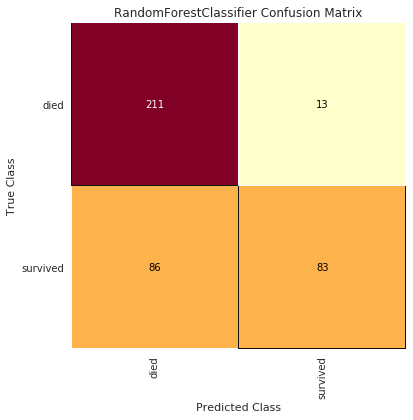

In [83]:
mapping = {0:"died",1:"survived"}
fig, ax = plt.subplots(figsize=(6,6))
cm_viz = ConfusionMatrix(rf5, 
                         classes=["died","survived"],
                         label_encoder=mapping)
cm_viz.score(X_test, y_test)
cm_viz.poof();
#fig.savefig("images/mlpr_0303.png", dpi=300, bbox_inches="tight")

## ROC Curve

In [84]:
y_pred = rf5.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7165442730346576

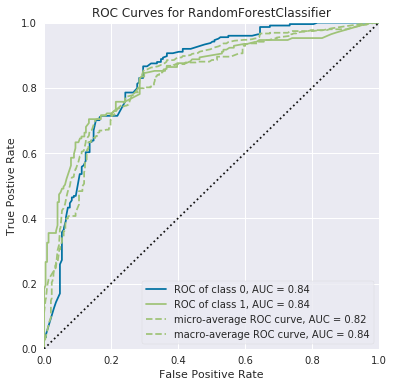

In [85]:
fig, ax = plt.subplots(figsize=(6,6))
roc_viz = ROCAUC(rf5)
roc_viz.score(X_test, y_test)
roc_viz.poof();
#fig.savefig("images/mlpr_0305.png")

## Learning Curve

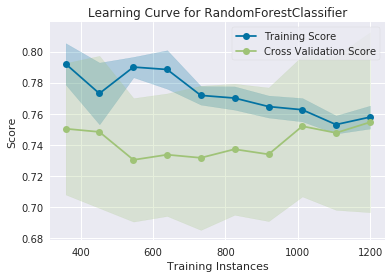

In [86]:
import numpy as np
fig, ax = plt.subplots(figsize=(6,4))
cv = StratifiedKFold(12)
sizes = np.linspace(0.3,1.0,10)
lc_viz = LearningCurve(rf5, cv=cv, train_sizes=sizes,
                      scoring="f1_weighted",
                      n_jobs=4,
                      ax=ax)
lc_viz.fit(X,y)
lc_viz.poof();
#fig.savefig("images/mlpr_0306.png")

## Deploy Model

In [87]:
import pickle
pic = pickle.dumps(rf5)
rf6 = pickle.loads(pic)
y_pred = rf6.predict(X_test)
roc_auc_score(y_test, y_pred)

0.7165442730346576